(supervised:general:feature-reduction)=
# Feature Reduction

Feature reduction or *dimensionality reduction* aims at reducing the number of features in a data set without deterioration results of supervised learning methods. This saves resources (memory, CPU time), but also may help interpreting the data. We distinguish two classes of methods for feature reduction:
* feature selection,
* feature transform.

A straight forward idea is feature selection or removal. One tries to identify relevant features and removes features of little or no relevance. Relevance here means influnce on the accuracy of the trained model. If we remove a feature, but the model trained on the reduced data set yields almost identical predictions as before, then the feature is considered irrelevant.

Feature transform refers to more complex methods which map the whole feature space to a lower dimensional space. Here, resulting new features lack easy interpretability because each contains information from many different original features.

Here we consider two methods for feature selection and one feature transforms method.

## Manual Feature Removal

Exploratory data analysis gives a first impression of feature properties and relations between features. Observations made during this phase of doing data science should be used to reduce the number of features.

One observation frequenly made in raw data sets are features, that contain (almost) the same value in each sample. Such features can be removed without loss of information.

Another frequent observation are highly correlated features. Plotting one feature versus another we see whether there is a functional dependence between them or whether they are uncorrelated. In the first case the plot shows a line, in the second case we see a cloud of points.

```{figure} dependence.svg
---
alt: example of two data sets with and without functional dependence
scale: 80%
---
Left image shows linear dependence, but functional dependency may also nonlinear (quadratic, for instance). On the right-hand side there's no obvious functional dependence.
```

In case of functional dependence one of the two considered features can be removed, because its values can be deduced from the remaining one. In other words, both features contain the same information, but in different representation.

There might also be features uncorrelated to the targets. If the plot of a feature against the targets shows a very homogeneous distribution of points all over the plotting area, then the feature is likely to have no influence on the targets. Thus, it can be removed. If in doubt, don't remove the feature because eyes may trick you about equal distribution of points.

## Permutation Feature Importance

Given a trained model we ask for the importance of each feature. We could remove one feature, retrain the model and compare prediction quality to the original model. Doing this for all features we see which features can be removed without deteriorating results. The drawback of that approach is that we have to train as many models as we have features.

A similar idea, which does not require additional training, is calculating *permutation feature importance*. Given a data set we permutate the values of a fixed feature and look at corresponding predictions. The smaller the deviation from the original predictions the less important is the feature. So deviation in predictions after permutating feature values is a measure of feature importance.

Scikit-Learn supports permutation feature importance via [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) function in the `inspection` module. We have to pass the trained model and a data set. The object returned by the function has a member `importances` containing a NumPy array with the feature importances. By default the function calculates feature importances for several different permutations. Mean and standard deviation can be used to get a summary for all permuations. Both are accessible via the `importances_mean` and `importances_std` members, respectively.

## Principal Component Analysis (PCA)

Principal component analysis is a powerful technique for deriving new features from existing ones (feature transformation). Original features may suffer from two problems:
* A feature might have low variance, that is, it contains few information. The extreme case is a feature with variance 0. Then all values of the feature are identical.
* Features might be correlated, that is, they contain redundant information. The extreme case is a feature whoes values are a fixed multiple of another feature's values.

Principal component analysis tackles both problems:
* PCA creates features with high variance and removes low variance features.
* Features created by PCA are uncorrelated.

We now go into the details of this important technique.

### Prerequisites

PCA only works for numerical features and **all features should be centered**. More sloppily we may say that PCA assumes that the data set is a point cloud centered at the origin.

Let $x_1,\ldots,x_n$ be the feature vectors of the data set and assume we have $m$ features.
Writing the feature vectors as rows of a matrix we obtain a matrix $X$ of size $n\times m$.
Denote the columns of $X$ by $\xi_1,\ldots,\xi_m$, that is, $\xi_1$ contains all values of the first feature, $\xi_2$ all values of the second feature, and so on; in formulas:
\begin{equation*}
\xi_1=\begin{bmatrix}x_1^{(1)}\\\vdots\\x_n^{(1)}\end{bmatrix},\quad\ldots,\quad
\xi_m=\begin{bmatrix}x_1^{(m)}\\\vdots\\x_n^{(m)}\end{bmatrix}.
\end{equation*}
Let's call $\xi_1,\ldots,\xi_m$ value vectors.

### Linear Feature Transforms

Given numbers $a^{(1)},\ldots,a^{(m)}$ the linear combination
\begin{equation*}
a^{(1)}\,\xi_1+\cdots+a^{(m)}\,\xi_m=X\,a
\end{equation*}
of the value vectors $\xi_1,\ldots,\xi_m$ can be considered the value vector of a new feature.
Taking more such linear combinations we derive more and more features from the original ones.

Say we create $\tilde{m}$ new features with value vectors $\tilde{\xi}_1,\ldots,\tilde{\xi}_{\tilde{m}}$, then the corresponding matrix $\tilde{X}$ of size $n\times\tilde{m}$ may be written as
\begin{equation*}
\tilde{X}=X\,A,
\end{equation*}
where each column of the *transform matrix* $A$ contains the coefficients of the linear combination yielding the corresponding new feature. The first column of $A$ contains the coefficients for $\tilde{\xi}_1$, for instance.
Dimensions of $A$ are $m\times\tilde{m}$. This can be seen by carrying out usual matrix multiplication: the first column of $X\,A$ is $X$ times the first column of $A$ and so on.

If the transform matrix $A$ is invertible, we may write
\begin{equation*}
\tilde{X}\,A^{-1}=X.
\end{equation*}
That is, we may switch back and forth between both feature sets as we like.
Obviously, invertibility of $A$ requires at least $m=\tilde{m}$.

If the transform matrix $A$ is invertible, then both feature sets contain identical information, but in different representation. There exist several approaches for contructing transform matrices. PCA is only one. Like PCA, most approaches aim at removing features carrying only few information. Thus, $A$ will not be invertible.

### Variance Maximization

By assumption the original value vectors $\xi_1,\ldots,\xi_m$ are centered (mean 0). One easily verifies, that derived value vectors then are centered (mean 0), too.

The idea of PCA is to find coefficient vectors $a$ such that the corresponding new value vector $X\,a$ has maximum variance with respect to all vectors $a$ of length 1.
Considering other lengths, too, would add no value. Looking at length 2, for instance, would yield a factor 4 in all variances (factor 2 for standard deviation), but the maximizing vector $a$ would have the same direction as for length 1.

Since $X\,a$ is centered, its variance is simply the sum of the squares of its components (up to constant factor); in other words: its squared length. Taking the square root does not change the maximizer. Thus, maximizing variance boils down to solving
\begin{equation*}
|X\,a|\to\max_{|a|=1}.
\end{equation*}

Some deeper mathematics reveals that maximum variance is given by the largest eigenvalue of the matrix $X^{\mathrm{T}}\,X$ and that the maximizer $a^\ast$ is a corresponding eigenvector.
The square matrix $X^{\mathrm{T}}\,X$ is known as *covariance matrix* in statistics.

The optimal coefficient vector $a^\ast$ yields a derived feature which contains a maximum of information compared to all other derivable features. Such a feature is called a *principal component* of the original features.

### Uncorrelated Features

Given the variance maximizing coefficient vector $a^\ast$ we would like to restrict our attention to only those derivable features which are completely uncorrelated to the new feature described by $a^\ast$. In this reduced set of features we then may look for maximum variance again. Repeating this process would yield a list of features with descending variance (list of *principal components*) and all features in the list would be mutually uncorrelated.

The only question to answer is: How to restrict the set of features to avoid any correlation with already extracted features? The answer is: We have to restrict all considerations to coefficient vectors yielding features orthogonal to all previously found variance maximizing features. Two derived features are uncorrelated if corresponding value vectors $\tilde{\xi}_i$ and $\tilde{\xi}_j$ have zero covariance. Because both are centered, covariance is $\tilde{\xi}_i^{\mathrm{T}}\,\tilde{\xi}_j$. Zero covariance thus is nothing else than orthogonality.

Assume that step by step we have found $k$ variance maximizing coefficient vectors $a^\ast_1,\ldots,a^\ast_k$. Then we restrict attention to vectors $a$ for which $X\,a$ is orthorgonal to all $X\,a^\ast_1,\ldots,X\,a^\ast_k$.

Starting with $k=1$ we go on until the space of derivable features (that is, the set of all linear combinations of original value vectors) is exhausted. We end up with at most $m$ new features. If we obtain less features, then the original feature set contained redundant information, which now got removed.

### Geometric Interpretation

Although we derived the PCA procedure from statistical considerations PCA has a nice geometric interpretation.

A value vector $\xi=X\,a$ of a derived feature contains the inner products of all samples with the coefficient vector $a$. The coefficient vector $a$ 'lives' in the same space as the samples: $\mathbb{R}^m$. Thus, maximizing $X\, a$ can be regarded as looking for a direction (1d subspace) such that the orthogonal projections of all samples onto that subspace have maximum range.

To get the second principal component we project all samples onto the $m-1$ dimensional subspace orthogonal to the first principal component and then look for the projection range maximizing direction inside this subspace.

Following this procedure until the space is exhausted we obtain a set of orthogonal unit vectors in the original feature space. In other words, the $a^\ast_1,a^\ast_2,\ldots$ define a new coordinate system. The transformed samples $\tilde{x}_1,\ldots,\tilde{x}_n$ in $\tilde{X}=X\,A$ simply are the original samples but expressed with respect to the new coordinate system.

### Removing Low Variance Features

PCA yields a list of uncorrelated centered features and their variances. Thus, me may remove low variance features from the list to reduce resource consumption when applying machine learning algorithms.

The remaining coefficient vectors in the list make up the transform matrix $A$ introduced above.

### Relation to Singular Value Decomposition (SVD)

PCA looks for eigenvalues and eigenvectors of $X^\mathrm{T}\,X$. This matrix is square, symmetric, and positive semidefinite. Thus, all eigenvalues are nonnegative real numbers.

The matrix $X$ itself lacks all those nice properties. Nonetheless, there is a transform very similar to PCA which applies directly to $X$, the singular value decomposition. SVD yields two orthonormal systems $\{u_1,\ldots,u_n\}$ and $\{v_1,\ldots,v_m\}$ and a list of nonnegative real numbers $s_1,\ldots,s_m$ such that
\begin{equation*}
X=U\,S\,V^{\mathrm{T}}.
\end{equation*}
Here $S$ is the 'diagonal' matrix of size $n\times m$ with $s_1,\ldots,s_m$ on its diagonal, $U$ and $V$ are the matrices having $u_1,\ldots,u_n$ and $v_1,\ldots,v_m$ as columns, respectively.

We have the following relations to PCA:
* $v_\kappa=a^\ast_\kappa$ (normalized eigenvectors of $X^{\mathrm{T}}\,X$),
* $u_\kappa=\frac{X\,a^\ast_\kappa}{|X\,a^\ast_\kappa|}$ (normalized principal components or eigenvectors of $X\,X^{\mathrm{T}}$),
* $s_\kappa=|X\,a^\ast_\kappa|$ (length of principal components or square roots of eigenvalues of $X^{\mathrm{T}}\,X$ and $X\,X^{\mathrm{T}}$).

Note that $U$ and $V$ are orthonormal matrices, implying $U^{-1}=U^{\mathrm{T}}$ and $V^{-1}=V^{\mathrm{T}}$. Thus,
\begin{equation*}
A=V,\qquad \tilde{X}=X\,A=U\,S.
\end{equation*}
Some of the $s_1,\ldots,s_m$ may be zero, indicating that the number of features can be reduced without loss of information. If some of the $s_1,\ldots,s_m$ are very small, then setting them to zero reduces the number of features while neglecting only very few information (*truncated singular value decomposition or TSVD*).

### PCA with Scikit-Learn

Scikit-Learn implements a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class in its `decomposition` module.
The constructor takes the number `n_components` of principal components to keep (`None` for all).
The `fit` method computes the principle components and `transform` yields transformed data.

After fitting the PCA object offers principal components and corresponding variances as member variables `components_` and `explained_variance_`.

Scikit-Learn's PCA automatically centers the input data and stores each component's mean in the `PCA` object's `mean_` member.

We start an illustrating example with all necessary imports and a function for plotting a point cloud.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition

from numpy.random import default_rng
rng = default_rng(0)

def plot_data(X, xlabel, ylabel, zlabel):
    ''' Scatter plot of data with properly configured axes. '''

    fig = go.Figure()
    fig.layout.width = 800
    fig.layout.height = 600

    fig.add_trace(go.Scatter3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        mode='markers',
        marker={'color': '#0000ff', 'size': 1}
    ))

    data_min = X.min()
    data_max = X.max()
    fig.update_scenes(
        xaxis_title_text=xlabel,
        yaxis_title_text=ylabel,
        zaxis_title_text=zlabel,
        xaxis_range=[data_min, data_max],
        yaxis_range=[data_min, data_max],
        zaxis_range=[data_min, data_max]
    )
    fig.update_layout(scene_aspectmode='cube', showlegend=False)

    return fig

We use simulated data with 3 features. For simple simulation we generate data following a multivariate normal distribution.

In [2]:
n = 500    # number of data points to generate

# generate data
X = rng.multivariate_normal([1, 2, 3], [[1, 0.2, 0.3], [0.2, 2, -0.1], [0.3, -0.1, 0.2]], n)

# plot data
fig = plot_data(X, 'feature 1', 'feature 2', 'feature 3')
fig.show()

Now we do a full PCA and plot the principal components. That is, we keep all principle components. In this case we do not have to pass an argument to the `PCA` constructor. Note that we multiply the length of the principle components by 3 for better visibility.

In [3]:
pca = decomposition.PCA()
pca.fit(X)

# plot
fig = plot_data(X, 'feature 1', 'feature 2', 'feature 3')

# plot principal components
vec = np.stack((pca.mean_, np.empty(3)), axis=1)
for i in range(0, 3):
    vec[:, 1] = vec[:, 0] + 3 * np.sqrt(pca.explained_variance_[i]) * pca.components_[i, :]
    fig.add_trace(go.Scatter3d(
        x=vec[0, :], y=vec[1, :], z=vec[2, :],
        mode='lines',
        line={'color': '#ff0000', 'width': 5}
    ))

fig.show()

It remains to transform the data according to the principal components.

In [4]:
X_transformed = pca.transform(X)

# plot
fig = plot_data(X_transformed, 'PCA feature 1', 'PCA feature 2', 'PCA feature 3')

# plot principal components
vec = np.stack((np.zeros(3), np.empty(3)), axis=1)
for i in range(0, 3):
    vec[:, 1] = 0
    vec[i, 1] = 3 * np.sqrt(pca.explained_variance_[i])
    fig.add_trace(go.Scatter3d(
        x=vec[0, :], y=vec[1, :], z=vec[2, :],
        mode='lines',
        line={'color': '#ff0000', 'width': 5}
    ))

fig.show()

If we want to reduce the number of features we may omit the last component (the one with smallest variance), resulting in a two-dimensional data set. To make `PCA.transform` do this for us we have to restart PCA with `n_components=2`.

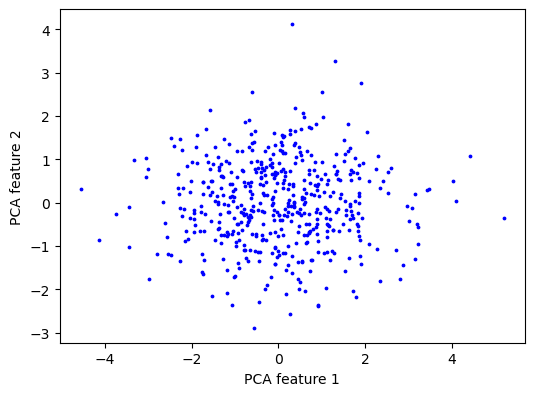

In [5]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)

X_transformed = pca.transform(X)

# plot transformed data
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c='#0000ff', s=3)
ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
ax.set_aspect('equal')

plt.show()

## Nonlinear Feature Reduction Methods

PCA is a linear method, that is, we apply a linear transform to the data. There exist many nonlinear methods for feature reduction. Such nonlinear methods are considered a separate branch of unsupervised machine learning and will be considered later on.